# Investigate a Dataset
## Udacity Data Analyst Nanodegree - Project 2

### Introduction
This notebook investigates the [Titanic](https://www.kaggle.com/c/titanic/data) dataset containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### Questions
The analysis of the Titanic dataset deals mainly with the relationship between survival of an individual and variables such as his:
* sex
* age
* passenger class
* ticket (fare) price
* number of siblings/spouses on board
* number of parents/children on board

Therefore we are investigating the following main question: **Which factors made survival of an individual more likely?**

During the course of analysis we are also  looking at the following specific questions:
1. How did sex, age and socio-economic (passenger class / ticket price) status influence survival?
2. How did relationships on board (number of siblings/spouses/parents/children) influence survival?

### Resources
* Udacity "Intro to data analysis" material
* [Python 3 documentation](https://docs.python.org/3/)
* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [NumPy documentation](http://docs.scipy.org/doc/)
* [Matplotlib documentation](http://matplotlib.org/contents.html#)
* [Seaborn documentation](https://stanford.edu/~mwaskom/software/seaborn/)
* [Markdown documentation](https://daringfireball.net/projects/markdown/syntax)
* [20 Python libraries you aren't using (but should)](https://www.oreilly.com/learning/20-python-libraries-you-arent-using-but-should)

### Environment setup

In [152]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# display plots inside the notebook
%matplotlib inline

# ensure compatibility with Python 2.x
# from __future__ import print_function

### Data ingestion

In [140]:
# load dataset from local file system
titanic = pd.read_csv("titanic_data.csv")

### Data exploration

In [84]:
# print shape of data set
titanic.shape

(891, 12)

In [4]:
# show first 5 rows of dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
# show last 5 rows of dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


#### Summary statistics
Describe summary statistics
* PassengerId: 891 passengers on board
* Survived: Only 38% of the passengers survived.
* PClass: Only few passengers could afford first class, most, about 50%, spent their time on board in third class
* Age: Only 714 observations contain information for age, potential data cleaning exercise? Mean age 30 with high std, youngest passenger still a baby, oldest passenger an old man(?) at age 80. He seems to be an extreme outlier, since the average age in the third percentile is 38.
* SibSp: Mean somewhat misleading, high std. There seems to be either a large family on board or someone married to many wifes (8)
* Parch: There seems to be a large family onboard (6 children)
* Fare: Mean price for a titanic ticket was 32 USD, high std. Apparently some passengers did not pay anything for their ticket (min = 0), while some potentially wealthy passengers paid up to 512 USD

Investigate interesting data points
* What does high standard deviation of Survied mean?
* Passengers in highest class (Pclass = 1)
* Youngest and oldest passenger on board (Age = 0.42/80)
* Who belonged to the large family?
* Who paid nothing at all and the maxium price?

In [6]:
# calculate summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Helper functions

In [7]:
# helper function to format a plot
#def titanic_plot(variable, plot_type="hist"):
#    """
#    Given a variable present in the titanic data set, the function plots the data as definied by plot_type applies formatting
#    """
#    titanic[variable].plot(kind=plot_type, title=variable, grid=False, legend=True)

# helper functions to print rows containing the min/max value of a variable
def titanic_min(variable):
    """
    Given a variable present in the titanic data set, the function prints the rows containing the min value
    """
    print("Information for min values of %s:" % variable)
    print(titanic.ix[titanic[variable] == min(titanic[variable])])
    
def titanic_max(variable):
    """
    Given a variable present in the titanic data set, the function prints the row containing the max value
    """
    print("Information for max values of %s:" % variable)
    print(titanic.ix[titanic[variable] == max(titanic[variable])])

#### Visualization
Besides looking at plain figures, we also like to investigate our data visually.

Let's look at **surivial** first. From the bar chart below we can see that only about 350 of 891 passengers survived their trip.

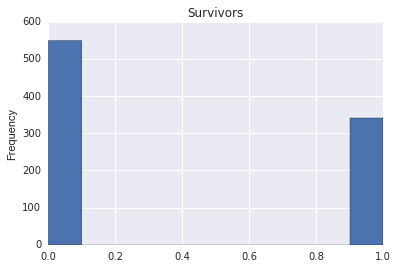

In [161]:
# plot survival data (to be standardized)
titanic["Survived"].plot(kind="hist", title="Survivors", grid=True)

What about **passenger class**? Apparently half of passengers were traveling in  third class. The other half almost equally split into second and first class.

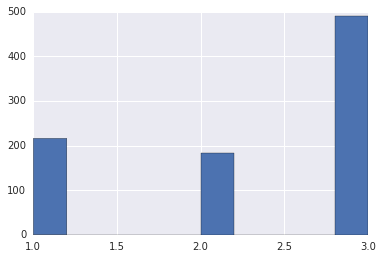

In [154]:
# plot passenger class data
titanic["Pclass"].hist()

Next, let's investigate the **age** distribution of Titanic passengers. Apparently most of the passengers were between 20 and 30 years old. From the histogram it is evident that there were some very old passengers, too.

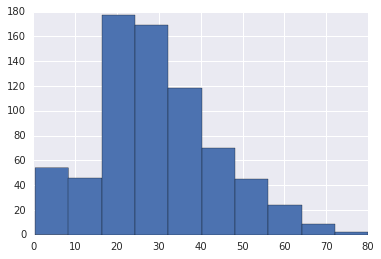

In [162]:
# plot age data
titanic["Age"].hist()

Now let's have a look at extreme ages. How old were the youngest/oldest passengers?
As can be seen from the output below, the youngest passenger was **not even 1 year old**, while the oldest passenger was already **80**. Interestingly both survived, despite travelling in different passenger classes.

In [11]:
# print information about youngest passenger
titanic_min("Age")

Information for min values of Age:
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  


In [12]:
# print information about oldest passenger
titanic_max("Age")

Information for max values of Age:
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex  Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male   80      0      0  27042    30   A23        S  


Let's look at distribution of siblings/spouses of Titanic passengers. Interestingly, most passengers either did not have any or just one siblings/spouses on board, while there was one family (or someone with a lot of spouses) with **8** relatives on board. 

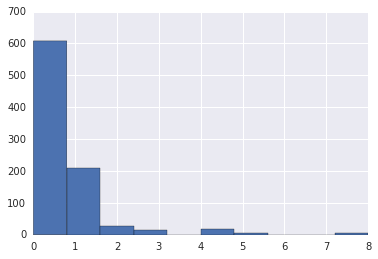

In [163]:
# plot sibling/spouse data
titanic["SibSp"].hist()

Now who was the family with maxium number of relatives?. As can be seen from the table below, it was the **Sage** family, which unfortunately did not survive their journey.

In [14]:
# print information about max/min values
titanic_max("SibSp")

Information for max values of SibSp:
     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2

What about the distribution of parents/childeren onboard of Titanic? The figure below shows that the majority of passengers did not have any children on board. As seen within the siblings/spouses data, there is one extreme case which we investigate below.

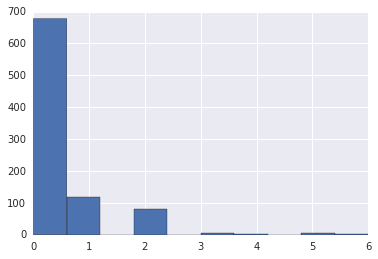

In [164]:
# plot parent/child data
titanic["Parch"].hist()

Apparently, Mrs. Goodwin was accompanied by **6 children** and unfortunately did not survive her trip.

In [16]:
# print information about min/max parent/child data
titanic_max("Parch")

Information for max values of Parch:
     PassengerId  Survived  Pclass                                     Name  \
678          679         0       3  Goodwin, Mrs. Frederick (Augusta Tyler)   

        Sex  Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
678  female   43      1      6  CA 2144  46.9   NaN        S  


Finally, let's dig into the distribution of fare prices. Obviously most passengers paid well below USD 100 for their ticket. There are a some passengers who paid more, e.g. between USD 100 and USD 300 while a few payed as much as USD 500.

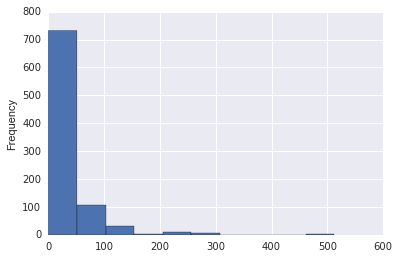

In [165]:
# plot fare data
titanic["Fare"].plot(kind="hist")

From the boxplot below we can see that the median fare price was well below USD 100 (from cell 5 we actually know that the average is USD 32 with standard distribution of approximately USD 50. Furthermore the fare price of roughly USD 500 seems to be an outlier. 

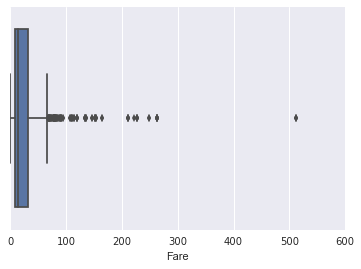

In [166]:
# plot fare data as box plot
#titanic["Fare"].plot(kind="box")
sns.boxplot(titanic["Fare"])

Now let's check the minium fare price. Intergestingly the minimum price is USD 0, meaning that 15 passengers did not pay for their ticket at all.

In [19]:
# print passengers who paid the minimum fare price
titanic_min("Fare")

Information for min values of Fare:
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0  

In [20]:
# print number of passengers with minimum ticket price
len(titanic[titanic["Fare"] == 0])

15

What about the maxium fare price? Obviously three passengers were willing to pay the maxium price of **USD 512**, which is 16 times higher than the average price USD 32. At least all three got a ticket for the first passenger class!

In [21]:
# print passengers who paid the maximum fare price
titanic_max("Fare")

Information for max values of Fare:
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex  Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female   35      0      0  PC 17755  512.3292          NaN        C  
679    male   36      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male   35      0      0  PC 17755  512.3292         B101        C  


### Data cleaning

Before moving on to actual analysis the data needs to be cleaned. During the exploration phase we discovered missing values for **Age** and **Cabin**. Furthermore some passengers were not assigned a proper ticket ID, but the value "Line". Another candidate for cleaning could be various extreme values in fare price, siblings/spouses or parents/children. How do we decide which values to keep and which to clean? One approach would be to go back to our initial question and check whether missing values in particular columns could impede analysis. As we are primary interested in factors influencing **survival**, e.g. sex, age, passenger class and other socio-economic variables, we should focus on these during data cleaning

Let's start with investigating real missing values: Age information is missing for 20% of all passengers, while cabin information is missing for **77**% of all passengers. Why do we have so little information on cabins?

In [22]:
# for each column print number of records where information is missing
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
# for reach column print missing values as percentage of total values
titanic.isnull().sum() / titanic.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Let's dig deeper on age and cabin

To be continued

In [24]:
# Print a subset of records with missing age information
titanic.ix[titanic["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [25]:
# Print a subset of records with missing cabin information
titanic.ix[titanic["Cabin"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


In [82]:
# to be done
titanic[titanic["Pclass"] == 3].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64

https://nmni.com/titanic/On-Board/Sleeping.aspx

To be continued

In [27]:
# Print records with missing embarked information
titanic.ix[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [28]:
# Print records where the value for ticket is "line"
titanic.ix[titanic["Ticket"] == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S


Since our analysis mainly focuses on personal data like age, and socio-economic information, we only remove rows with missing age information

In [141]:
# Remove PassengerId, Name, Ticket, Cabin and Embarked column
titanic_cleaned = titanic.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=False)

In [142]:
# Remove any records with missing age information
titanic_cleaned.dropna(subset=["Age"], inplace=True)

In [144]:
# Convert categorical variables (Sex and Embarked) into dummy variables for analysis
#titanic_cleaned = pd.get_dummies(columns=["Sex"])
titanic_cleaned = pd.get_dummies(data=titanic_cleaned, columns=["Sex"])
titanic_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22,1,0,7.2500,0,1
1,1,1,38,1,0,71.2833,1,0
2,1,3,26,0,0,7.9250,1,0
3,1,1,35,1,0,53.1000,1,0
4,0,3,35,0,0,8.0500,0,1


In [145]:
# Check whether rows with missing age information were succesfully removed
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [148]:
# Print number of rows remaining after cleaning
titanic_cleaned.shape[0]

714

### Analysis

After exploring and cleaning the data, we are finally able to analyze our main question:
Which factors made survival of an individual more likely?

In [160]:
titanic_cleaned.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,0.538826,-0.538826
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,-0.155460,0.155460
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,0.103950,-0.103950
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,0.246972,-0.246972
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,0.184994,-0.184994
Sex_female,0.538826,-0.155460,-0.093254,0.103950,0.246972,0.184994,1.000000,-1.000000
Sex_male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,-1.000000,1.000000


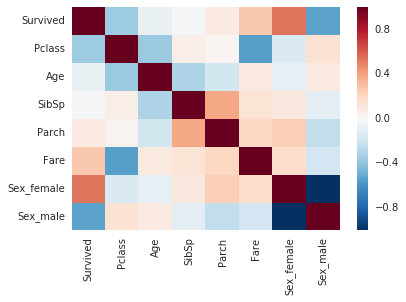

In [159]:
# Visualize corrleation matrix
sns.heatmap(titanic_cleaned.corr())

In [178]:
# to be completed
test = pd.cut(titanic_cleaned["Age"], bins=4, labels=["young", "adult", "senior", "old"], retbins=True)

In [90]:
titanic_by_sex = titanic_cleaned.groupby("Sex")

In [91]:
titanic_by_sex["Survived"].mean()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

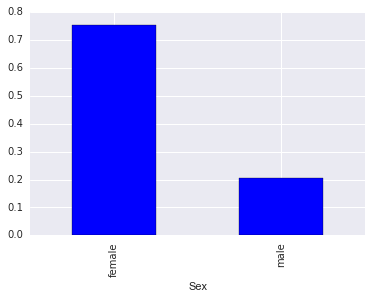

In [157]:
titanic_by_sex["Survived"].mean().plot(kind="bar")

In [ ]:
titanic_by_sex_age = titanic_cleaned.groupby(["Sex", "T"])

In [92]:
titanic_by_sex["Fare"].mean()

Sex
female    47.582759
male      27.268836
Name: Fare, dtype: float64

In [34]:
titanic_by_sex_and_class = titanic.groupby(["Sex", "Pclass"])

In [35]:
titanic_by_sex_and_class[["Age", "Fare"]].describe()

Age        Fare
Sex    Pclass                              
female 1      count   85.000000   94.000000
              mean    34.611765  106.125798
              std     13.612052   74.259988
              min      2.000000   25.929200
              25%     23.000000   57.244800
              50%     35.000000   82.664550
              75%     44.000000  134.500000
              max     63.000000  512.329200
       2      count   74.000000   76.000000
              mean    28.722973   21.970121
              std     12.872702   10.891796
              min      2.000000   10.500000
              25%     22.250000   13.000000
              50%     28.000000   22.000000
              75%     36.000000   26.062500
              max     57.000000   65.000000
       3      count  102.000000  144.000000
              mean    21.750000   16.118810
              std     12.729964   11.690314
              min      0.750000    6.750000
              25%     14.125000    7.854200
              50%     21.500000   12.475000
              75%     29.750000   20.221875
              max     63.000000   69.550000
male   1      count  101.000000  122.000000
              mean    41.281386   67.226127
              std     15.139570   77.548021
              min      0.920000    0.000000
              25%     30.000000   27.728100
              50%     40.000000   41.262500
              75%     51.000000   78.459375
              max     80.000000  512.329200
       2      count   99.000000  108.000000
              mean    30.740707   19.741782
              std     14.793894   14.922235
              min      0.670000    0.000000
              25%     23.000000   12.331250
              50%     30.000000   13.000000
              75%     36.750000   26.000000
              max     70.000000   73.500000
       3      count  253.000000  347.000000
              mean    26.507589   12.661633
              std     12.159514   11.681696
              min      0.420000    0.000000
              25%     20.000000    7.750000
              50%     25.000000    7.925000
              75%     33.000000   10.008300
              max     74.000000   69.550000

### Conclusion

Points to consider
* Explicitly say that your findings are tentative
* To stand out procude statistical tests (correlation matrix, t-tests) and use advanced NumPy/Pandas